In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import imread
%matplotlib inline

# Neural Networks & Deep Learning
## _A Random Walk on ~~Physics~~ Machine Learning_

## A brief Introduction

Neural Networks are a powerful, modern machine learning technique, applicable to the state of the art in all sorts of science:
-  Image recognition
 - Google Photos, Snapchat, Facebook...
- Natural Language Processing
 - Siri, OK Google
- Optimisation and strategy
 - AlphaGo
 - Playing atari
- Much much more!



## An example: ImageNet

- Online Database of images labelled as 1000 seperate (but hierachical) categories.
- Training set of 1.2 million images, with a test set of 150,000.
- Annual competition to build classifier with the best performance against the test set in various categories: The Imagenet Large Scale Visual Recognition Challenge
- Some very fine grained categories: can you guess this one?

In [4]:
!rm NP2658.jpg
!wget http://www.worldofstock.com/slides/NPF2658.jpg

rm: cannot remove 'NP2658.jpg': No such file or directory
--2016-10-09 21:26:59--  http://www.worldofstock.com/slides/NPF2658.jpg
Resolving www.worldofstock.com (www.worldofstock.com)... 104.154.72.40
Connecting to www.worldofstock.com (www.worldofstock.com)|104.154.72.40|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://slides.worldofstock.com/NPF2658.jpg [following]
--2016-10-09 21:26:59--  http://slides.worldofstock.com/NPF2658.jpg
Resolving slides.worldofstock.com (slides.worldofstock.com)... 216.58.212.80, 2a00:1450:4009:813::2010
Connecting to slides.worldofstock.com (slides.worldofstock.com)|216.58.212.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29005 (28K) [image/jpeg]
Saving to: ‘NPF2658.jpg.1’

NPF2658.jpg.1       100%[===================>]  28.33K  --.-KB/s    in 0.05s   

2016-10-09 21:27:00 (568 KB/s) - ‘NPF2658.jpg.1’ saved [29005/29005]



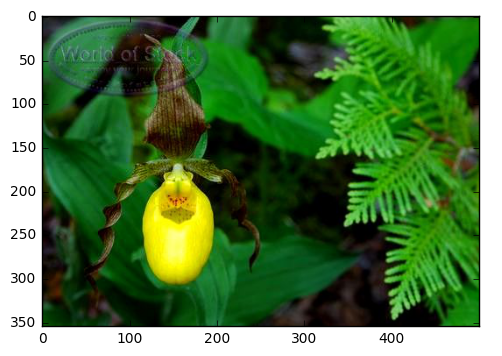

In [5]:
img = imread('NPF2658.jpg')
plt.imshow(img)

### If you said "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum" then you were right!

When imagenet first ran in 2010, the state of the art got around 28% right (using an algorithm called 'SIFT features', and some other clever tricks). 



### Last year...

## The _lowest_ ranking team got an classification **ERROR** rate of 7.288%
## The highest ranking team got  2.991%

## This should give you an idea of how powerful these models can be

# What is Machine Learning?



I'm going to focus on supervised machine learning for classification, to be a bit more concrete.

In the case of classification, we have a dataset of $S$ samples from $\boldsymbol{x_i}, i \in [1,S]$ from a probability distribution $X$, and their corresponding labels $y_i$. In general the inputs $x_i$ will be vectors, of dimension $N$.

For example, here is some imaginary data, with two categories (two possible values of $y$), where $N = 2$ (which makes it convenient to plot). 


- I think the idea of data being points in a Euclidean space is a really deep idea, and I'm going to talk about it a lot.

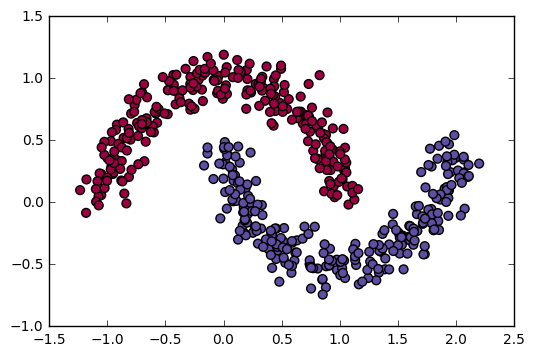

In [8]:
from sklearn import datasets
import bokeh.palettes 
X,y = datasets.make_moons(n_samples = 500, noise = .1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

We can imagine that there exists a function $f(\boldsymbol{x})$, called the _target function_, that maps any input $\boldsymbol{x}$ drawn from $X$ to it's corresponding class: that is, $f$ returns the ground truth of any input.


This function is unknowable, but we want a way to find an _approximation_ of $f$, which we call the hypothesis, or model, $g(\boldsymbol{x})$.

We normally do this by restricting ourselves to one particular _class_ of functions for $g$, for which we have an algorithm for either improving a model, or contructing an optimal one.
- e.g Linear regression restricts $g$ to be of the form $g(x) = mx + c$

Neural Networks are one such class of function: there are lots of others (support vector machines, decision trees...) but we're going to ignore them and focus on neural nets for now.

## Neural Networks

Neural networks are often described by using brain analogies.
- original motivation for the model was a very simplistic model of real neurons in the brain.
- **Neural networks don't really resemble biological brains in any way**



The motivating biological model is called the _perceptron_. The output, or activation,  of a single perceptron is

$$ a(x) = \sigma ( \boldsymbol{x} \bullet \boldsymbol{W} + b )$$

where $\boldsymbol{x}$ is an input vector, $\boldsymbol{W}$ is a 'weight' vector, and b is a scalar called the bias. The activation function $\sigma$ is in principle any continuous nonlinear function, but the most popular choices are _sigmoid_, _tanh_ and _ReLU_ neurons.

In [3]:
!wget http://matlabgeeks.com/wp-content/uploads/2011/05/Perceptron.bmp

--2016-10-08 18:06:33--  http://matlabgeeks.com/wp-content/uploads/2011/05/Perceptron.bmp
Resolving matlabgeeks.com (matlabgeeks.com)... 66.96.149.1
Connecting to matlabgeeks.com (matlabgeeks.com)|66.96.149.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139134 (136K) [image/bmp]
Saving to: ‘Perceptron.bmp’

Perceptron.bmp      100%[===================>] 135.87K   339KB/s    in 0.4s    

2016-10-08 18:06:33 (339 KB/s) - ‘Perceptron.bmp’ saved [139134/139134]



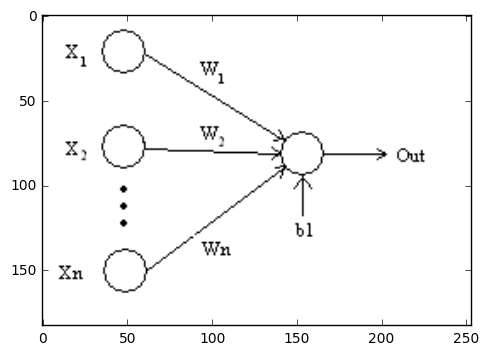

In [9]:
img = imread("Perceptron.bmp")
plt.imshow(img)

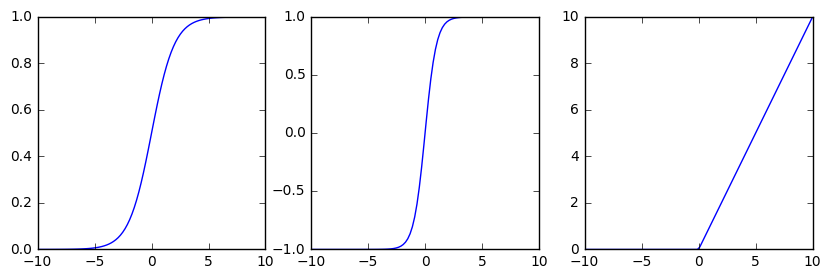

In [40]:
plt.rcParams['figure.figsize'] = (10, 3) 
x = np.linspace(-10,10,100)
sig = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(x,np.zeros(len(x)))
p2, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(x,sig)
ax2.plot(x,tanh)
ax3.plot(x,relu)

It's important to understand the vector notation is just a convenient and compact way of expressing the formula for a _hyperplane_. e.g in 2d the last euqation (minus the activation function) is just a straight line:
$$\boldsymbol{x} \bullet \boldsymbol{W} = W_1 x_1 + W_2 x_2 + b$$
which is equivalent to 
$$
x_2 = \frac{W_1}{W_2}x_1 + \frac{b}{W_2} \\
x_2 = mx_1 + c 
$$


The vector notation can be easily extended to think about _layers_ of neurons, each with an activation $a_i$, processing the same input
$$
\boldsymbol{a} = \sigma( \boldsymbol{x} \bullet \boldsymbol{W} + \boldsymbol{b} )
$$
where now $\boldsymbol{b}$ is a vector and $\boldsymbol{W}$ is a matrix. We could alternatively write this as
$$
\boldsymbol{a_i} = \sigma( \boldsymbol{x_j} \boldsymbol{ W_{ji}} + \boldsymbol{b_i})
$$
using the Einstein summation convention that we sum on repeated indices, to make it clearer this is just a set of equations for single perceptrons.

A neural network is just a set of these layers feeding into each other, with at least one _hidden layer_ before the output layer (which would have a number of neurons equal to the number of classes, and assign each one a score). Mathematically
$$ \boldsymbol{a}^{l+1} = \sigma( \boldsymbol{a}^{l} \bullet \boldsymbol{W}^l + \boldsymbol{b}^l ) $$
where the input's $\boldsymbol{a}^l$ to the 0th layer would be the data vector $\boldsymbol{x}$

In [37]:
!wget http://www.extremetech.com/wp-content/uploads/2015/07/NeuralNetwork.png

--2016-09-27 22:36:10--  http://www.extremetech.com/wp-content/uploads/2015/07/NeuralNetwork.png
Resolving www.extremetech.com (www.extremetech.com)... 104.104.8.125
Connecting to www.extremetech.com (www.extremetech.com)|104.104.8.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306599 (299K) [image/png]
Saving to: ‘NeuralNetwork.png’

NeuralNetwork.png   100%[===================>] 299.41K   472KB/s    in 0.6s    

2016-09-27 22:36:11 (472 KB/s) - ‘NeuralNetwork.png’ saved [306599/306599]



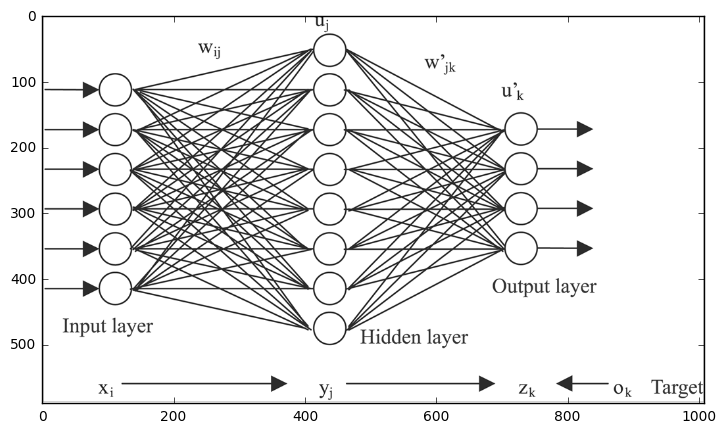

In [11]:
plt.rcParams['figure.figsize'] = (10, 5) 
plt.imshow(imread('NeuralNetwork.png'))

# Is everyone still awake?
- Why does $\sigma$ have to be a nonlinear function for this to work?


## Just a bit more maths...

So now we've defined what a way to mathematically express a hypothesis $g$, using a neural net with hidden layers.

In order to learn we need two more things:
- A way to evaluate how good our hypothesis is 
- A way to use this information to improve our model



To do this we use  a _cost function_, or _loss_. 
The cost function will compare the predictions made by our model, which we can call $y'$, with the ground truth $y$. It needs to be high when the numbers are different and 0 when they are totally correct. 
A popular one is the cross entropy
    $$ C = - y ln(y')  - (1 - y) ln(1 - y')$$
Slightly simpler (but less good in practice) is the squared error
    $$ C = (y - y')^2$$



###  Improving our model =  _minimising the loss_. 
So we want an algorithm that, given our hypothesis $g$, a cost function, and a set of data, tells us how to improve our hypothesis. For neural networks, we use _back-propagation_:
- Calculate the gradients of each element of the weight matrices and biases with respect to the cost function 
- Change the weights and biases by moving them in the direction of their gradient w.r.t the loss, i.e
    $$ W^l \rightarrow W^l - \eta \frac{\partial{C}}{\partial{W^{l}} } $$
    $$ b^l \rightarrow b^l - \eta \frac{\partial{C}}{\partial{b^{l}} } $$
where $\eta$ is the _learning rate_. 


# And that's the basic idea!

To get more of an idea of how this works, lets return to the toy dataset.
- First, we can train a single-layer neural network, with just one perceptron.
- Remember this is a _linear_ classifier

In [12]:
import tensorflow as tf
sess = tf.Session()

In [13]:
N = 2
N_Class = 2
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

in_x = tf.placeholder(tf.float32, [None,N])
in_y = tf.placeholder(tf.int64, [None])
W = weight_variable([N,N_Class])
b = bias_variable([N_Class])
a = tf.matmul(in_x,W) + b

predicted_class = tf.argmax(a,1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_class,in_y),tf.float32) )
loss = tf.reduce_mean( tf.nn.sparse_softmax_cross_entropy_with_logits(a,in_y) )

train_step = tf.train.AdamOptimizer(0.01).minimize(loss)


In [15]:
sess.run(tf.initialize_all_variables())
for i in range(100):
    if i % 10 == 0:
        print "Accuracy: {}, Loss: {}".format(sess.run(accuracy, feed_dict = {in_x: X, in_y: y}), 
                                              sess.run(loss, feed_dict = {in_x: X, in_y: y}))
    sess.run(train_step, feed_dict = {in_x: X, in_y: y})

Accuracy: 0.536000013351, Loss: 0.686703920364
Accuracy: 0.871999979019, Loss: 0.604277670383
Accuracy: 0.84399998188, Loss: 0.537404417992
Accuracy: 0.833999991417, Loss: 0.485324114561
Accuracy: 0.832000017166, Loss: 0.445797890425
Accuracy: 0.829999983311, Loss: 0.415984213352
Accuracy: 0.829999983311, Loss: 0.39327403903
Accuracy: 0.829999983311, Loss: 0.375612616539
Accuracy: 0.832000017166, Loss: 0.361513733864
Accuracy: 0.832000017166, Loss: 0.349948316813


In [16]:
plt.rcParams['figure.figsize'] = (6, 5) 

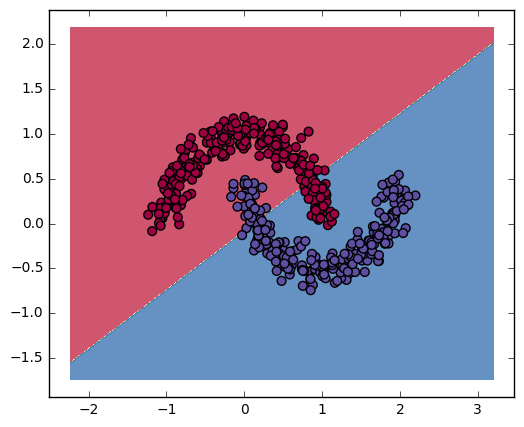

In [17]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = sess.run(predicted_class, feed_dict = {in_x: np.c_[xx.ravel(), yy.ravel()]})
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [19]:
N = 2
N_Class = 2
H_Neurons = 50
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


in_x = tf.placeholder(tf.float32, [None,N])
in_y = tf.placeholder(tf.int64, [None])
W1 = weight_variable([N,H_Neurons])
b1 = bias_variable([H_Neurons])
a1 = tf.nn.relu(tf.matmul(in_x,W1) + b1)

W2 = weight_variable([H_Neurons,N_Class])
b2 = bias_variable([N_Class])
a2 = tf.matmul(a1,W2) + b2

predicted_class = tf.argmax(a2,1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_class,in_y),tf.float32) )
loss = tf.reduce_mean( tf.nn.sparse_softmax_cross_entropy_with_logits(a2,in_y) )

train_step = tf.train.AdamOptimizer(0.01).minimize(loss)


In [20]:
sess.run(tf.initialize_all_variables())
for i in range(800):
    if i % 100 == 0:
        print "Accuracy: {}, Loss: {}".format(sess.run(accuracy, feed_dict = {in_x: X, in_y: y}), 
                                              sess.run(loss, feed_dict = {in_x: X, in_y: y}))
    sess.run(train_step, feed_dict = {in_x: X, in_y: y})

Accuracy: 0.853999972343, Loss: 0.674049913883
Accuracy: 0.944000005722, Loss: 0.122891038656
Accuracy: 1.0, Loss: 0.0198495201766
Accuracy: 1.0, Loss: 0.00782247912139
Accuracy: 1.0, Loss: 0.00428578164428
Accuracy: 1.0, Loss: 0.0027214884758
Accuracy: 1.0, Loss: 0.00188443774823
Accuracy: 1.0, Loss: 0.00137423595879


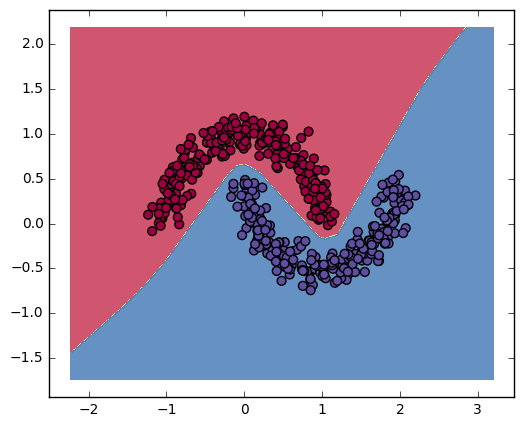

In [21]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = sess.run(predicted_class, feed_dict = {in_x: np.c_[xx.ravel(), yy.ravel()]})
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

It's worth thinking for a minute about why the extra layer works: what is it doing? 


- A matrix can be thought of as defining a mapping of points from one space to another.
- The hidden layer maps the raw data space $X$ to a different space. 
- The second layer trains a linear classifier on this transformed data in this space. 
- As a result the network learns a _transformation to a more seperable feature space_ than the features started with.

# Neural Networks and Images
What is the dimensionality of an image? 

In [71]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrUD23FHG0tlFnDI-qb7jtxKGInmINiXW699QOheQICuInDvrx

--2016-09-28 15:33:52--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrUD23FHG0tlFnDI-qb7jtxKGInmINiXW699QOheQICuInDvrx
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 216.58.208.174, 2a00:1450:4009:808::200e
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|216.58.208.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4505 (4.4K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcTrUD23FHG0tlFnDI-qb7jtxKGInmINiXW699QOheQICuInDvrx’

images?q=tbn:ANd9Gc 100%[===================>]   4.40K  --.-KB/s    in 0.01s   

2016-09-28 15:33:53 (345 KB/s) - ‘images?q=tbn:ANd9GcTrUD23FHG0tlFnDI-qb7jtxKGInmINiXW699QOheQICuInDvrx’ saved [4505/4505]



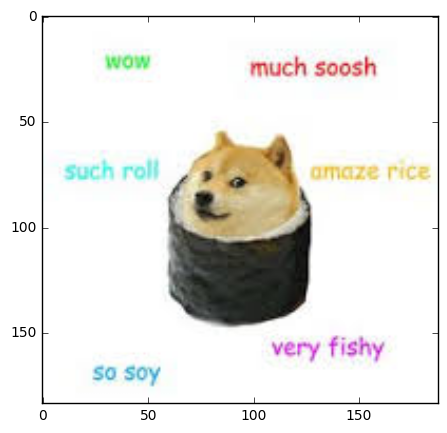

In [23]:
doge = imread('images?q=tbn:ANd9GcTrUD23FHG0tlFnDI-qb7jtxKGInmINiXW699QOheQICuInDvrx')
plt.imshow(doge)

In [73]:
doge.shape

(184, 188, 3)

A bitmap image is just an array, of dimension $width \times height \times 3$ (for the RGB colour channels).
Alternatively, its a vector in a vector space of that dimension: e.g the image above has $184 \times 183 \times 3 = 103776$ components.

Remember that our data is drawn from a probabilty distribution $X$ in our data space, in this case the space of all 103776 dimensional images.

What does $X$ look like? 

We can easily see its not just a uniform distribution over the space by drawing a vector from this uniform distribution:

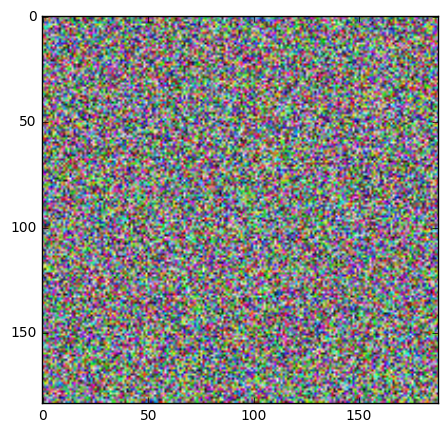

In [25]:
vec = np.random.random([184,188,3])
plt.imshow(vec)

## Food (maybe sushi?) for Thought:
- What is the probability that running the above command will produce a vector in $X$, if $X$ is the probability distribution of  images of dogs? 
- What does this say about the relative volume that the 'cloud' of vectors $\boldsymbol{x}$ where $p_X(\boldsymbol{x}) > 0$ would take up relative to the volume of the entire space of 184x188x3 images?

The distribution of things we are interested in doesn't take up very much of the data space, but lies on a _manifold_ of lower dimensionality. 
- This is one way to explain why image compression is possible!



Raw data (i.e the numerical value of each pixel) is not very seperable: $X$ has some kind of very complicated structure!

We would like to have more meaningful variables to train our classifiers on. 
One approach is to come up with useful features ourselves, based on some domain knowledge.

_Deep_ learning attempts to build neural networks can learn these features directly from the raw data. Similarly to the way I argued that the hidden layer learned a transformation to a more seperable space, succesive layers of a neural net (if carefully trained!) can learn _hierachical_ features: the first layer learns to detect low level features like lines, edges and blobs of colour, then the higher layers learn more complex composite features from the output of the preceding layer. 


In [1]:
import caffe
import os
caffe_root = os.path.join("/","home","lewis","caffe")

if os.path.isfile(caffe_root + '/models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'):
    print 'CaffeNet found.'
else:
    print 'Downloading pre-trained CaffeNet model...'
    !/home/lewis/caffe/scripts/download_model_binary.py /home/lewis/caffe/models/bvlc_reference_caffenet

CaffeNet found.


In [2]:
caffe.set_mode_cpu()

model_def = caffe_root + '/models/bvlc_reference_caffenet/deploy.prototxt'
model_weights = caffe_root + '/models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [28]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

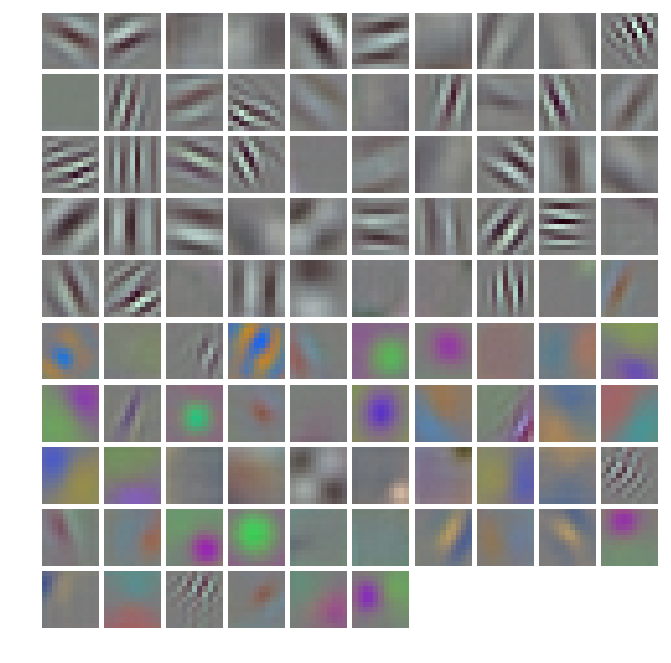

In [29]:
# the parameters are a list of [weights, biases]
plt.rcParams['figure.figsize'] = (8, 8) 
plt.rcParams['image.interpolation'] = 'nearest' 
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

These are the convolution kernels learned by the first layer of this trained model. 
- This is a _convolutional_ network, very common in image processing, which restricts the model to learn convolution kernels in the early layers, rather than matrices connecting the entire input.
- Basically the same as restricting each 'neuron' to only be receptive to a local area, then scanning that neuron over the image. 
- Forces the network to learn translation invariant features.
- Lets see it in action...

In [29]:
!wget https://i.ytimg.com/vi/tntOCGkgt98/maxresdefault.jpg

--2016-10-06 22:33:08--  http://www.yourpetessentials.com/wp-content/uploads/2015/12/potty-trained-cat-220x220.jpg
Resolving www.yourpetessentials.com (www.yourpetessentials.com)... 184.168.192.13
Connecting to www.yourpetessentials.com (www.yourpetessentials.com)|184.168.192.13|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10794 (11K) [image/jpeg]
Saving to: ‘potty-trained-cat-220x220.jpg’

potty-trained-cat-2 100%[===================>]  10.54K  29.2KB/s    in 0.4s    

2016-10-06 22:33:09 (29.2 KB/s) - ‘potty-trained-cat-220x220.jpg’ saved [10794/10794]



In [37]:
!ls

images?q=tbn:ANd9GcTrUD23FHG0tlFnDI-qb7jtxKGInmINiXW699QOheQICuInDvrx
maxresdefault.jpg
minimal_net.ipynb
NeuralNetwork.png
Neural Networks & Deep Learning - A RWOP.ipynb
NPF2658.jpg
potty-trained-cat-220x220.jpg
too-cute-doggone-it-video-playlist.jpg


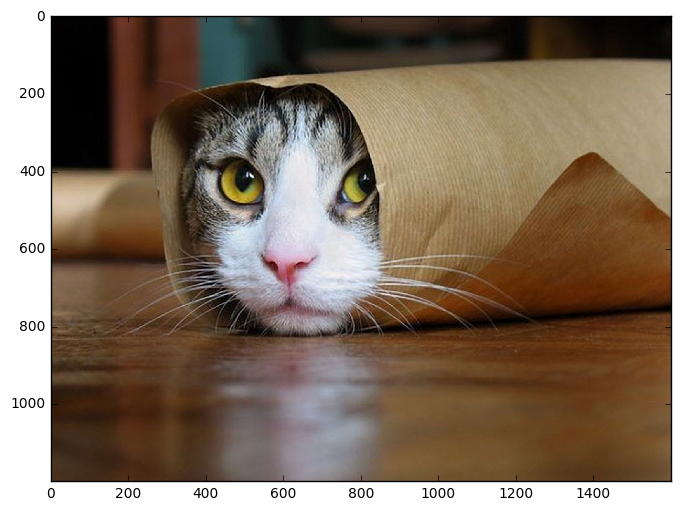

In [34]:
cat = caffe.io.load_image('maxresdefault.jpg')
plt.imshow(cat)

In [35]:
net.blobs['data'].reshape(50,
                         3,
                         227,227)
mu = np.load(caffe_root + '/python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)

# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))


mean-subtracted values: [('B', 104.0069879317889), ('G', 116.66876761696767), ('R', 122.6789143406786)]


In [36]:

labels_file = caffe_root + '/data/ilsvrc12/synset_words.txt'
if not os.path.exists(labels_file):
    !/home/lewis/caffe/data/ilsvrc12/get_ilsvrc_aux.sh
    
labels = np.loadtxt(labels_file, str, delimiter='\t')

In [37]:
transformed_image = transformer.preprocess('data', cat)
net.blobs['data'].data[...] = transformed_image

### perform classification
output = net.forward()
output_prob = output['prob'][0] 

print 'predicted class:', labels[output_prob.argmax()]
top_inds = output_prob.argsort()[::-1][:5]  # reverse sort and take five largest items

print 'probabilities and labels:'
zip(output_prob[top_inds], labels[top_inds])

predicted class: n02124075 Egyptian cat
probabilities and labels:


[(0.39473873, 'n02124075 Egyptian cat'),
 (0.23480959, 'n02123045 tabby, tabby cat'),
 (0.17850496, 'n02123159 tiger cat'),
 (0.030882021, 'n04265275 space heater'),
 (0.030184744, 'n04131690 saltshaker, salt shaker')]

Let's look at the reactions of the kernels above to this image:

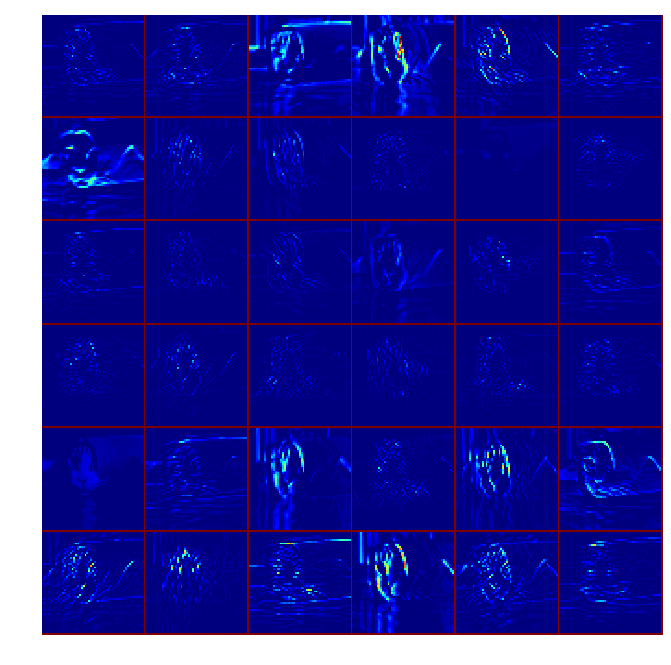

In [38]:
feat = net.blobs['conv1'].data[0, :36]
vis_square(feat)

The kernels pick out some particular feature from the images, like a line, edge or texture. This is used by the later layers. Lets take a quick look at the structure of this network:

In [8]:
for param_name, param in net.params.iteritems():
    print param_name + '\t' + str(param[0].data.shape)+',' + str(param[1].data.shape)

conv1	(96, 3, 11, 11),(96,)
conv2	(256, 48, 5, 5),(256,)
conv3	(384, 256, 3, 3),(384,)
conv4	(384, 192, 3, 3),(384,)
conv5	(256, 192, 3, 3),(256,)
fc6	(4096, 9216),(4096,)
fc7	(4096, 4096),(4096,)
fc8	(1000, 4096),(1000,)


# Machine Learning and Physics

- Machine learning has applications in physics too!
- Modern high energy and astrophysics experiments produce enormous quantities of data. Only a fraction of these contain events of scientific interest, and it is infeasible to deal with them by hand. 
- In addition modern experimental machines can produce data faster and in greater quantities than can ever be physically stored on disc: requires selection algorithms that are efficient enough to cope with processing at high speeds, and accurate enough to leave to work unsupervised, to filter events before they are even recorded. 
- Examples: 
    - CERN (obvious)
    - Square Kilometre Array: expected rate of _petabits_ ($10^{15}$) per second raw data production rates (more than global internet traffic!)
- My current masters project is about machine learning algorithms for pulsar searches.

# Resources if you are interested:
- [Neural networks and deep learning][1]: An online book that derives backpropagation from scratch and shows how to implement a neural net totally 'by hand' in numpy
- [The unreasonable effectiveness of recurrent neural networks][2]: A fantastic blog post on recurrent nets (which are very cool indeed) and some crazy stuff thats been done with them
- [Atari][9] A neural network plays atari!
- [Grabber Farm][10]: Robots learning to pick stuff up
- [Colah's Blog][3]: Whole series of posts about deep learning and neural nets, including some more mathematical treatment of data as manifolds.
- [Tensorflow][4]: An open-source neural net library, which has some great hands on tutorials.
- [Caffe][5]: Another one, more tailored for image recognition, which comes with pre-trained models. **WARNING: CAFFE IS A NIGHTMARE TO INSTALL**
- [Torch][6]: Yet another neural net library, with the quirk of being in lua.
- [Scikit-Learn][7]: Easy machine learning in python, has a nice set of tutorials too.
- [Fork this talk on github][8]: This entire presentation is a jupyter notebook, and I plan to make the source avaliable on my github page, so you can see and run all the code I used to generate this slideshow! 


[1]: http://neuralnetworksanddeeplearning.com/
[2]: http://karpathy.github.io/2015/05/21/rnn-effectiveness/
[3]: http://colah.github.io/
[4]: https://www.tensorflow.org/
[5]: http://caffe.berkeleyvision.org/
[6]: http://torch.ch/
[7]: http://scikit-learn.org/
[8]: https://github.com/lsgos
[9]: https://www.youtube.com/watch?v=V1eYniJ0Rnk
[10]: https://research.googleblog.com/2016/03/deep-learning-for-robots-learning-from.html

# Questions?